Here, we try to recreate all examples from the [Pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/visualization.html) visualization documentation page. Let us first import the needed libraries:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

# Basic Plotting: plot
We will demonstrate the basics, see the cookbook for some advanced strategies.

The plot method on Series and DataFrame is just a simple wrapper around plt.plot():

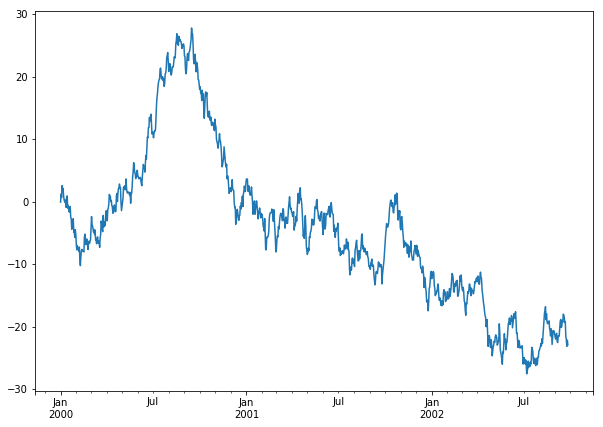

In [2]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

ts.plot_bokeh()
ts.plot(figsize=(10,7));

If the index consists of dates, it calls gcf().autofmt_xdate() to try to format the x-axis nicely as per above.

On DataFrame, plot() is a convenience to plot all of the columns with labels:

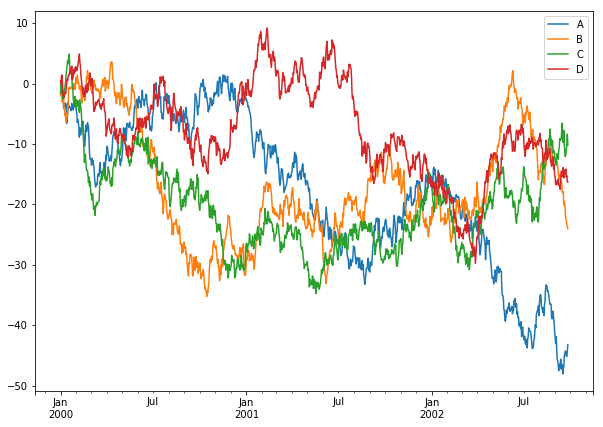

In [3]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

df.plot_bokeh()
df.plot(figsize=(10,7));

You can plot one column versus another using the x and y keywords in plot():

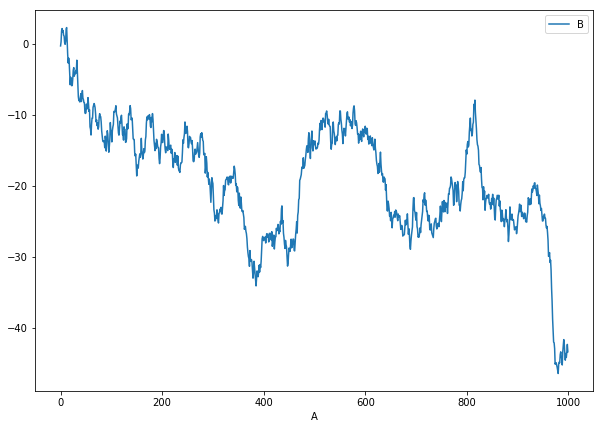

In [4]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))

df3.plot_bokeh(x='A', y='B', xticks=range(0,2000,200))
df3.plot(x='A', y='B', figsize=(10,7));

##  Lineplot: Docstring Examples

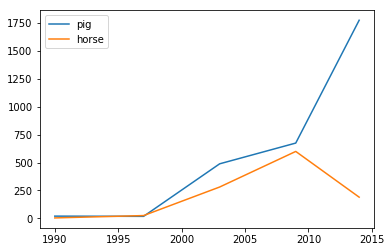

In [5]:
df = pd.DataFrame({
            'pig': [20, 18, 489, 675, 1776],
            'horse': [4, 25, 281, 600, 190]}, 
                index=[1990, 1997, 2003, 2009, 2014])
df.plot_bokeh.line()
df.plot.line()

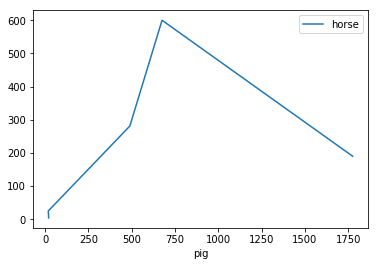

In [7]:
df.plot_bokeh.line(x='pig', y='horse')
df.plot.line(x='pig', y='horse')

# Other Plots

Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:

* **bar** or **barh** for bar plots
* **hist** for histogram
* **box** for boxplot
* **kde** or **density** for density plots
* **area** for area plots
* **scatter** for scatter plots
* **hexbin** for hexagonal bin plots
* **pie** for pie plots


# Bar Plot

For labeled, non-time series data, you may wish to produce a bar plot:

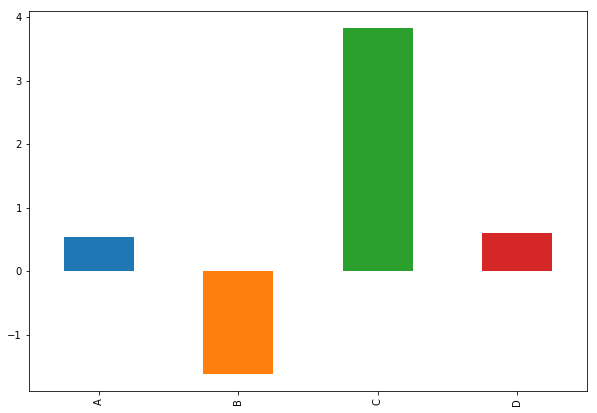

In [9]:
df.iloc[5].plot_bokeh(kind='bar', legend=False)
df.iloc[5].plot(kind='bar', figsize=(10,7));

Calling a DataFrame’s plot.bar() method produces a multiple bar plot:

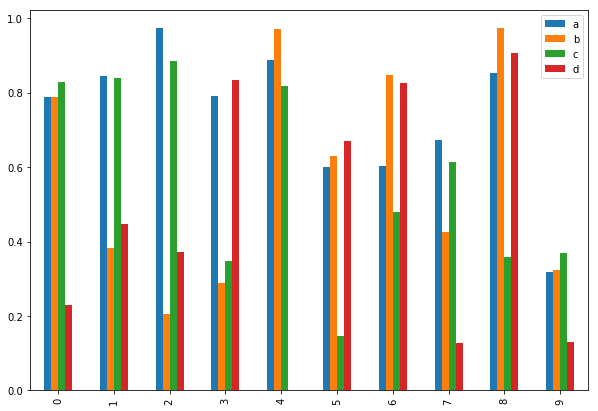

In [10]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot_bokeh(kind="bar")
df2.plot(kind="bar", figsize=(10,7));

To produce a stacked bar plot, pass stacked=True:

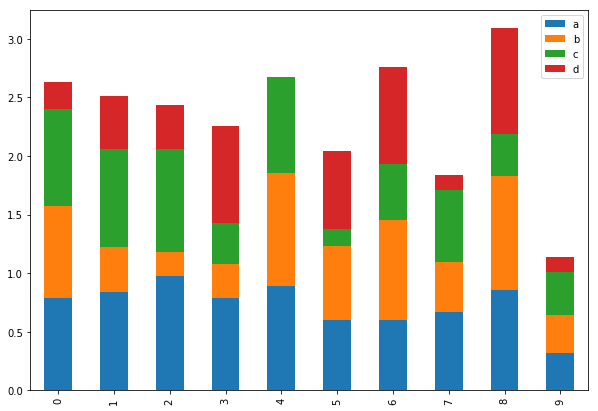

In [11]:
df2.plot_bokeh(kind="bar", stacked=True)
df2.plot(kind="bar", figsize=(10,7), stacked=True);

To get horizontal bar plots, use the barh method:

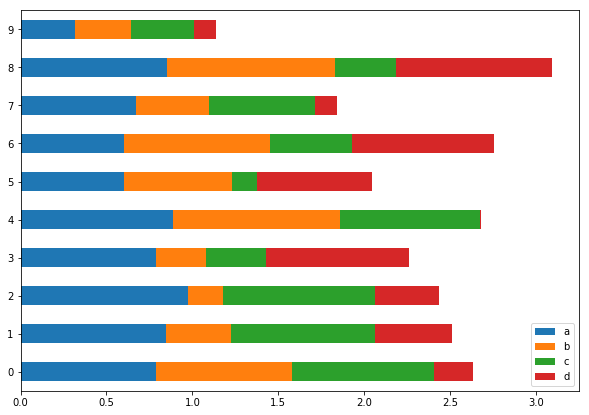

In [12]:
df2.plot(kind="barh", stacked=True, figsize=(10,7));
df2.plot_bokeh(kind="barh", stacked=True);

## Bar Plot: Docstring Examples

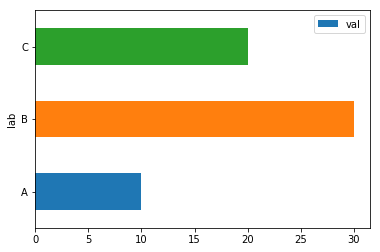

In [5]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
df.plot_bokeh.barh(x='lab', y='val')
df.plot.barh(x='lab', y='val')

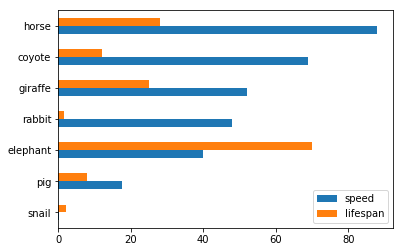

In [6]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                    'lifespan': lifespan}, index=index)
df.plot_bokeh.barh()
df.plot.barh()

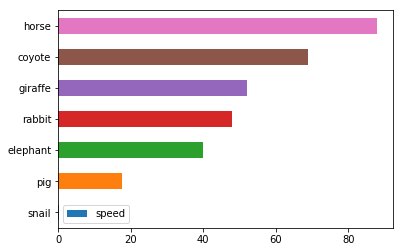

In [7]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                    'lifespan': lifespan}, index=index)
df.plot_bokeh.barh(y="speed")
df.plot.barh(y="speed")

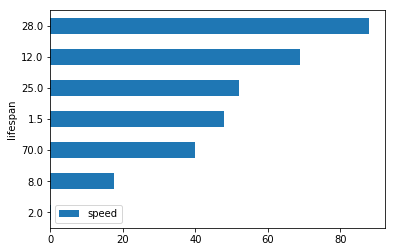

In [14]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                    'lifespan': lifespan}, index=index)
df.plot_bokeh.barh(x='lifespan')
df.plot.barh(x='lifespan')

# Histograms

Histograms can be drawn by using the DataFrame.plot.hist() and Series.plot.hist() methods.

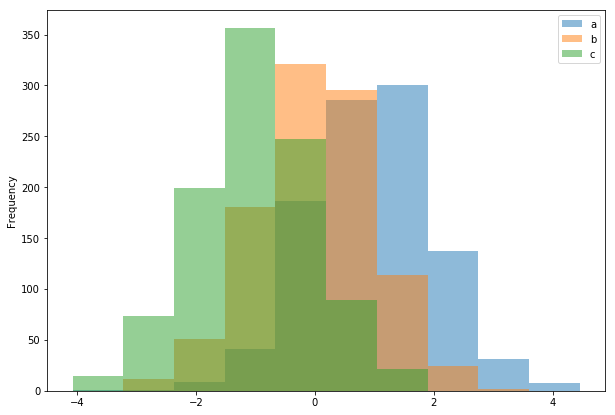

In [9]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df4.plot(kind="hist", alpha=0.5, figsize=(10,7));
df4.plot_bokeh(kind="hist", line_color=True);


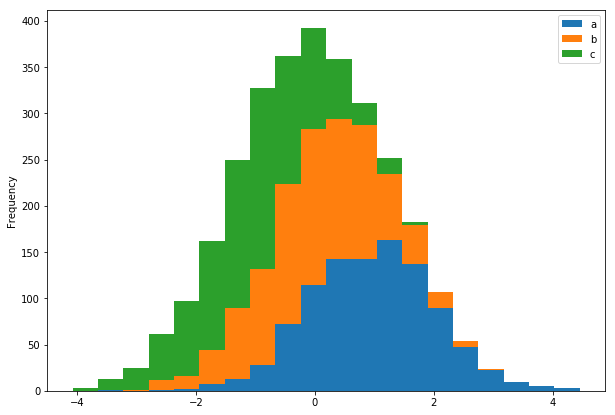

In [11]:
df4.plot(kind="hist", stacked=True, bins=20, figsize=(10,7));
df4.plot_bokeh(kind="hist", stacked=True, bins=20, vertical_xlabel=True, line_color=None);

## Histogram: Docstring Examples

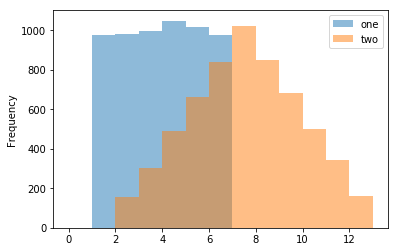

In [21]:
df = pd.DataFrame(
            np.random.randint(1, 7, 6000),
            columns = ['one'])
df['two'] = df['one'] + np.random.randint(1, 7, 6000)
df.plot_bokeh.hist(bins=np.arange(14), alpha=0.5)
df.plot.hist(bins=np.arange(14), alpha=0.5)

# BoxPlots

ValueError: Allowed plot kinds are 'line', 'point', 'scatter', 'bar', 'barh', 'hist', 'area', 'pie'.

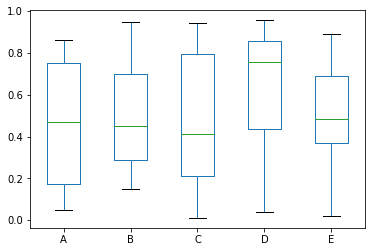

In [21]:
np.random.seed = 4
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

df.plot(kind="box")
df.plot_bokeh(kind="box")

# Box Plots

Boxplot can be drawn calling Series.plot.box() and DataFrame.plot.box(), or DataFrame.boxplot() to visualize the distribution of values within each column.

For instance, here is a boxplot representing five trials of 10 observations of a uniform random variable on [0,1):

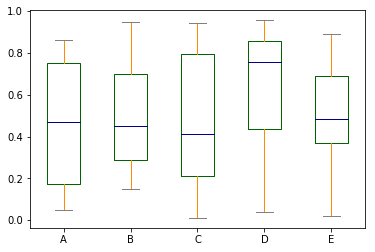

In [22]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
                     medians='DarkBlue', caps='Gray')
df.plot(kind="box", color=color, sym='r+')
df.plot_bokeh(kind="box", color=color, sym='r+')

.....

.....

.....

.....

.....

.....

.....

.....

# Area Plot

You can create area plots with Series.plot.area() and DataFrame.plot.area(). Area plots are stacked by default. To produce stacked area plot, each column must be either all positive or all negative values.

When input data contains NaN, it will be automatically filled by 0. If you want to drop or fill by different values, use dataframe.dropna() or dataframe.fillna() before calling plot.

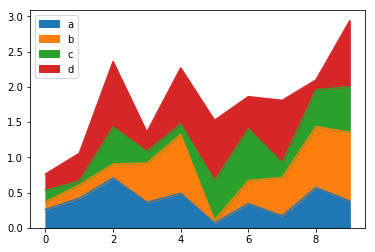

In [2]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df.plot(kind="area")
df.plot_bokeh(kind="area", stacked=True, alpha=0.7);

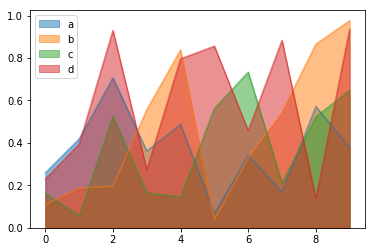

In [3]:
df.plot(kind="area", stacked=False)
df.plot_bokeh(kind="area");

# Hexagonal Bin Plot

## ?????????????

# Pie plot

You can create a pie plot with DataFrame.plot.pie() or Series.plot.pie(). If your data includes any NaN, they will be automatically filled with 0. A ValueError will be raised if there are any negative values in your data.

Figure(id='1041', ...)

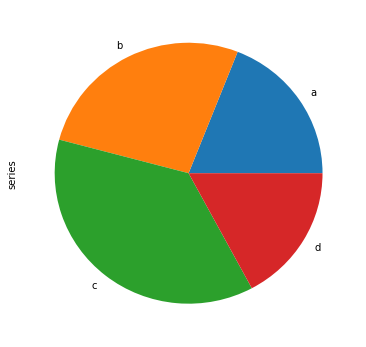

In [2]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')

series.plot.pie(figsize=(6, 6))
series.plot_bokeh(kind="pie")

Figure(id='1472', ...)

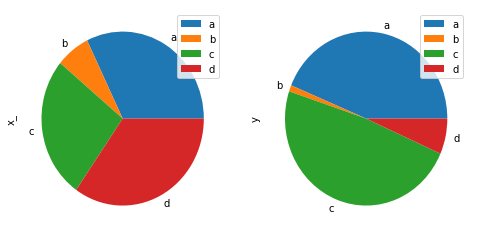

In [8]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x_', 'y'])

df.plot.pie(subplots=True, figsize=(8, 4))
df.plot_bokeh(kind="pie")

## Pieplot: Docstring examples

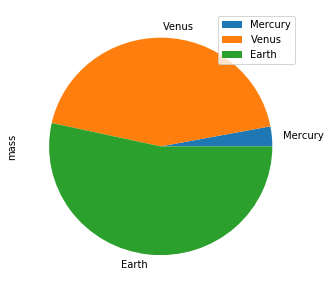

In [5]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                 'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
df.plot_bokeh.pie(y='mass')
df.plot.pie(y='mass', figsize=(5, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022019D794A8>,
      dtype=object)

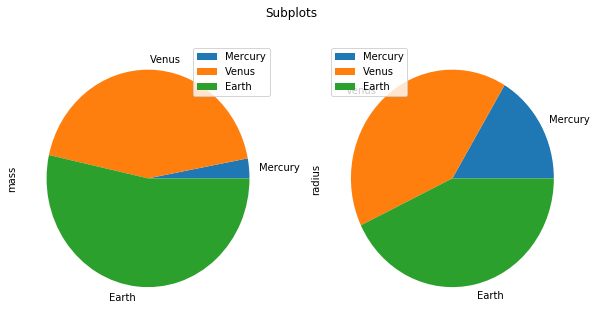

In [7]:
df.plot_bokeh.pie(title="Nested pieplots")
df.plot.pie(subplots=True, figsize=(10,5), title="Subplots")

# Scatterplot

## Scatterplot: Docstring examples

length


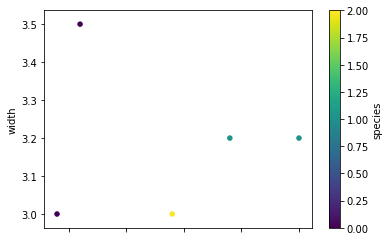

In [21]:
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1], [6.4, 3.2, 1],
                   [5.9, 3.0, 2]],
                  columns=['length', 'width', 'species'])
df.plot_bokeh.scatter(x='length', y='width', category='species', colormap="Viridis")
df.plot.scatter(x='length', y='width', c='species',colormap="viridis")